# Activity 1: Correlated Random Walk - 1 Trajectory

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import wrapcauchy
from scipy.stats import levy_stable
from scipy.stats import cauchy
#from plotly
import plotly.graph_objects as go

## Vec2d Class

In [1]:
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Select rotations from a Cauchy distribution (scipy).

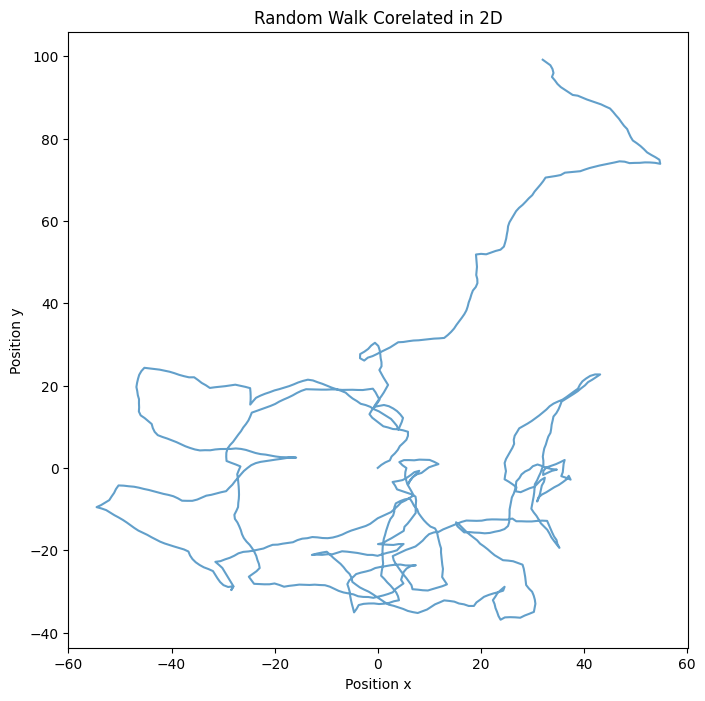

In [8]:
def correlated_random_walk_2D(n_steps, scale=0.1):
    # n_steps: number of steps in the random walk
    # scale: scale parameter for the Cauchy distribution that controls the "spread" of the rotations
    # Initialize the position and initial direction
    x = np.zeros(n_steps)
    y = np.zeros(n_steps)
    # Random start direction.
    angle = np.random.uniform(0, 2 * np.pi)
    for i in range(1, n_steps):
        # Select a rotation from the Cauchy distribution.
        rotation = cauchy.rvs(scale=scale)
        # Update the direction using rotation.
        angle += rotation
        # Calculate the new displacement.
        x[i] = x[i-1] + np.cos(angle)
        y[i] = y[i-1] + np.sin(angle)
    return x, y
# Simulation parameters.
n_steps = 1000
scale = 0.1  # This parameter can be modified to change the simulation.
# Generate the random walk.
x, y = correlated_random_walk_2D(n_steps, scale)
# Get a graphyc for the random walk.
plt.figure(figsize=(8, 8))
plt.plot(x, y, alpha=0.7)
plt.title("Random Walk Corelated in 2D")
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.show()

## Implement usign Vec2d class.

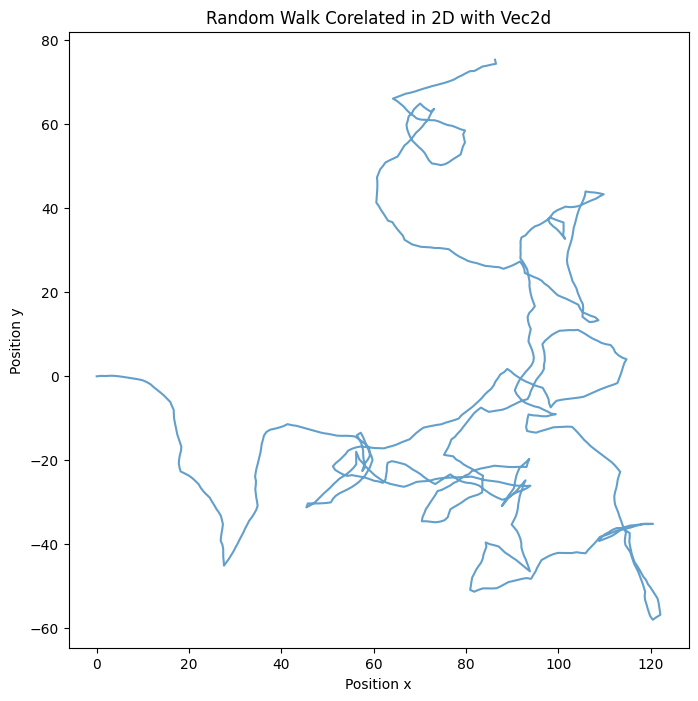

In [12]:
def correlated_random_walk_2D_vec2d(n_steps, scale=0.1):
    # n_steps: number of steps in the random walk
    # scale: scale parameter for the Cauchy distribution that controls the "spread" of the rotations
    # Initialize the position and initial direction
    position = Vec2d(0, 0)
    direction = Vec2d(1, 0)
    # Arrays to save the trajectory
    trajectory_x = []
    trajectory_y = []
    for _ in range(n_steps):
        # Save the current position
        trajectory_x.append(position.x)
        trajectory_y.append(position.y)
        # Select a rotation from the Cauchy distribution.
        rotation_angle = cauchy.rvs(scale=scale)
        # Rotate the current position.
        direction = direction.rotated(rotation_angle)
        # Update the position.
        position += direction
    return trajectory_x, trajectory_y
# Simulation parameters.
n_steps = 1000
scale = 0.1  # This parameter can be modified to change the simulation.
# Generate the random walk.
trajectory_x, trajectory_y = correlated_random_walk_2D_vec2d(n_steps, scale)
# Get a graphyc for the random walk.
plt.figure(figsize=(8, 8))
plt.plot(trajectory_x, trajectory_y, alpha=0.7)
plt.title("Random Walk Corelated in 2D with Vec2d")
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.show()

## Keep trajectory in a numpy array

In [ ]:
def correlated_random_walk_2D_numpy(n_steps, scale=0.1):
    # n_steps: number of steps in the random walk
    # scale: scale parameter for the Cauchy distribution that controls the "spread" of the rotations
    # Initialize the position and initial direction
    trajectory = np.zeros((n_steps, 2))
    direction = np.array([1, 0])  # Unit vector in the x direction
    for i in range(1, n_steps):
        # Select a rotation from a Cauchy distribution
        rotation_angle = cauchy.rvs(scale=scale)
        # Calculate the sine and cosine of the rotation angle
        cos_theta = np.cos(rotation_angle)
        sin_theta = np.sin(rotation_angle)
        # Apply the rotation to the current direction
        new_direction = np.array([
            direction[0] * cos_theta - direction[1] * sin_theta,
            direction[0] * sin_theta + direction[1] * cos_theta
        ])
        # Update the position by adding the new direction to the current position
        trajectory[i] = trajectory[i - 1] + new_direction
        # Update the current direction
        direction = new_direction
    return trajectory
# Parameters for the simulation
n_steps = 1000
scale = 0.1  # This parameter can be modified to change the simulation.
# Generate the correlated random walk
trajectory = correlated_random_walk_2D_numpy(n_steps, scale)
# Get a graphyc for the random walk.
plt.figure(figsize=(8, 8))
plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.7)
plt.title("Correlated Random Walk in 2D (with Numpy)")
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.show()

## Visualize trajectory using plotly - 2D projection

# Activity 5: Correlated Random Walk - Vec2d - N Trajectories

## Generate as many CRW trajectories as specified on a control variable n_traj.

## Each of the trajectories should be generated using a unique Cauchy coefficient.

## Implement usign Vec2d class.

## Keep the trajectories in a Pandas Data Frame.

## Visualize trajectories using plotly - 3D projection